In [1]:
import pandas as pd
from rdflib import Graph

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
path = '../'
#path = '../'

In [3]:
from rdflib.plugins.sparql.processor import SPARQLResult

def sparql_results_to_df(results: SPARQLResult) -> pd.DataFrame:
    """
    Export results from an rdflib SPARQL query into a `pandas.DataFrame`,
    using Python types. See https://github.com/RDFLib/rdflib/issues/1179.
    """
    return pd.DataFrame(
        data=([None if x is None else x.toPython() for x in row] for row in results),
        columns=[str(x) for x in results.vars],
    )


def build_query(target):
    query = """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX ex: <http://example/#> 
    PREFIX treatment_drug: <http://example/Treatment_Drug#>

    select distinct ?treatment (count(?ddi) as ?count_ddi)
    where {
        #?treatment rdf:type ex:Treatment .
        ?treatment ex:belong_to ex:"""+target+""" .
        optional {?treatment ex:hasInteraction ?ddi .}
        #optional {?treatment ex:related_to ?ddi .}
        } Group by ?treatment
        """
    return query

In [4]:
g = Graph()
g.parse(path + "G1.ttl", format="ttl")
g2 = Graph()
g2.parse("G2.ttl", format="ttl")
g3 = Graph()
g3.parse("G3.ttl", format="ttl")

<Graph identifier=N2621ea77b95a481fba2b0744f79b089b (<class 'rdflib.graph.Graph'>)>

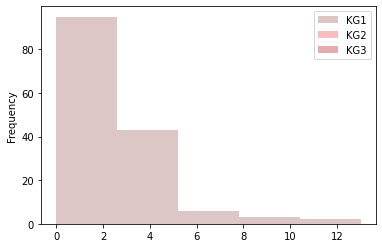

In [5]:
query = build_query('effective')
qres = g.query(query)
df_effective = sparql_results_to_df(qres)

df_plot = pd.DataFrame(columns=['KG1', 'KG2', 'KG3'])
df_plot['KG1']=list(df_effective.count_ddi)
#df = df_effective[['count_ddi']]
col = [mcolors.CSS4_COLORS['rosybrown'], mcolors.CSS4_COLORS['lightcoral'], mcolors.CSS4_COLORS['indianred']]
ax = df_plot.plot.hist(bins=5, alpha=0.5, color=col)


<AxesSubplot:ylabel='Frequency'>

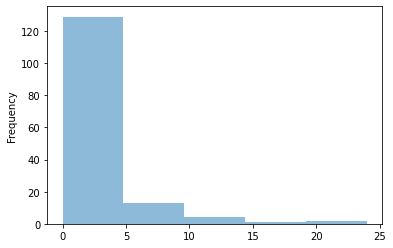

In [6]:
query = build_query('effective')
qres = g2.query(query)
df_effective = sparql_results_to_df(qres)

df_plot['KG2']=list(df_effective.count_ddi)
#df = df_effective[['count_ddi']]
df_plot['KG2'].plot.hist(bins=5, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

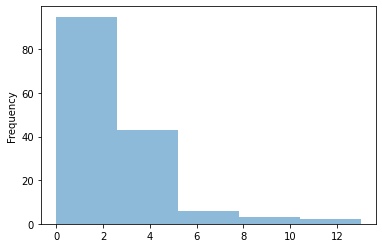

In [7]:
query = build_query('effective')
qres = g3.query(query)
df_effective = sparql_results_to_df(qres)

df_plot['KG3']=list(df_effective.count_ddi)
#df = df_effective[['count_ddi']]
df_plot['KG3'].plot.hist(bins=5, alpha=0.5)

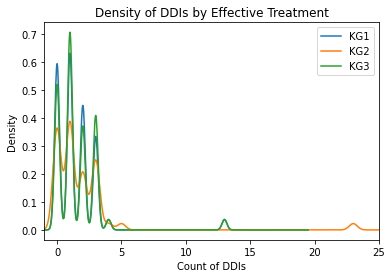

In [346]:
#df_plot['G2_effective']=list(df_effective.count_ddi)
ax = df_plot.plot.kde(bw_method=0.1)
ax.set_xlabel('Count of DDIs')
fig = ax.get_figure()
plt.xlim([-1, 25])
plt.title('Density of DDIs by Effective Treatment')
fig.savefig('Plots/Density_effective_treatment.pdf', format='pdf', bbox_inches='tight')

In [8]:
import seaborn as sns

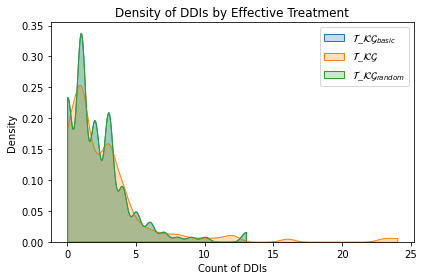

In [9]:
col = [mcolors.CSS4_COLORS['rosybrown'], mcolors.CSS4_COLORS['lightcoral'], mcolors.CSS4_COLORS['brown']]
fig, ax = plt.subplots()
sns.kdeplot(data=df_plot['KG1'], ax=ax, fill=True, shade=True,
            cut=0, bw_adjust=.4, label='${\cal{T\_KG}}_{basic}$')
sns.kdeplot(data=df_plot['KG2'], ax=ax, fill=True, shade=True,
            cut=0, bw_adjust=.4, label='$\cal{T\_KG}$')
sns.kdeplot(data=df_plot['KG3'], ax=ax, fill=True, shade=True,
            cut=0, bw_adjust=.4, label='${\cal{T\_KG}}_{random}$')

ax.legend( loc='upper right') #bbox_to_anchor=(1.02, 1.02),
ax.set_xlabel('Count of DDIs')
plt.title('Density of DDIs by Effective Treatment')
plt.tight_layout()
plt.savefig('Plots/Density_effective_treatment.pdf', format='pdf', bbox_inches='tight')

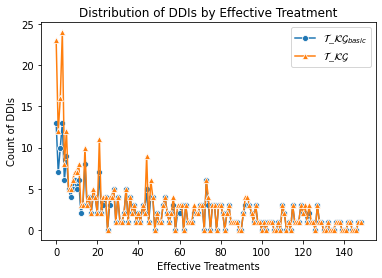

In [10]:
fig, ax = plt.subplots()
sns.lineplot(data=df_plot['KG1'], ax=ax, dashes=False, marker='o', label='${\cal{T\_KG}}_{basic}$')
sns.lineplot(data=df_plot['KG2'], ax=ax, dashes=False, marker='^', label='$\cal{T\_KG}$')
#ax = sns.lineplot(data=df_plot[['KG1', 'KG2']], dashes=False, markers=True)
ax.set_xlabel('Effective Treatments')
ax.set_ylabel('Count of DDIs')
plt.title('Distribution of DDIs by Effective Treatment')
plt.savefig('Plots/Distribution_DDI_Effective_Treatment.pdf', format='pdf', bbox_inches='tight')

In [11]:
count = df_plot.loc[df_plot.KG2>df_plot.KG1].count()
count

KG1    28
KG2    28
KG3    28
dtype: int64

In [12]:
28/145

0.19310344827586207

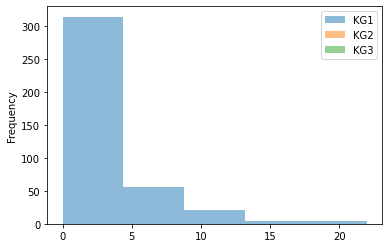

In [13]:
query = build_query('low_effect')
qres = g.query(query)
df_effective = sparql_results_to_df(qres)

df_plot = pd.DataFrame(columns=['KG1', 'KG2', 'KG3'])
df_plot['KG1']=list(df_effective.count_ddi)
#df = df_effective[['count_ddi']]
ax = df_plot.plot.hist(bins=5, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

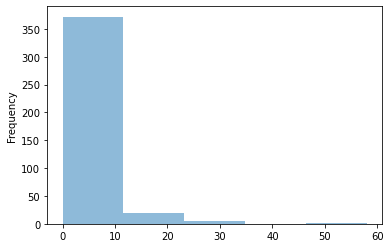

In [14]:
query = build_query('low_effect')
qres = g2.query(query)
df_effective = sparql_results_to_df(qres)

df_plot['KG2']=list(df_effective.count_ddi)
#df = df_effective[['count_ddi']]
df_plot['KG2'].plot.hist(bins=5, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

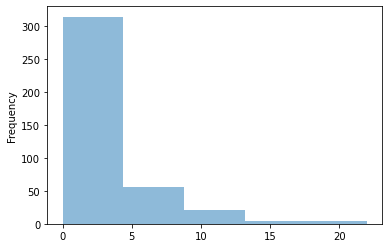

In [15]:
query = build_query('low_effect')
qres = g3.query(query)
df_effective = sparql_results_to_df(qres)

df_plot['KG3']=list(df_effective.count_ddi)
#df = df_effective[['count_ddi']]
df_plot['KG3'].plot.hist(bins=5, alpha=0.5)

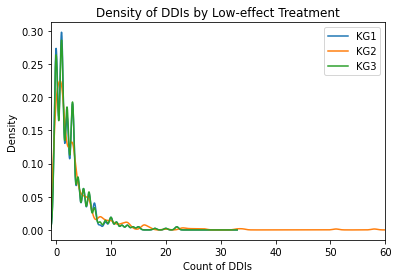

In [350]:
ax = df_plot.plot.kde(bw_method=0.1)
ax.set_xlabel('Count of DDIs')
fig = ax.get_figure()
plt.xlim([-1, 60])
plt.title('Density of DDIs by Low-effect Treatment')
fig.savefig('Plots/Density_decrease_effectiveness_treatment.pdf', format='pdf', bbox_inches='tight')

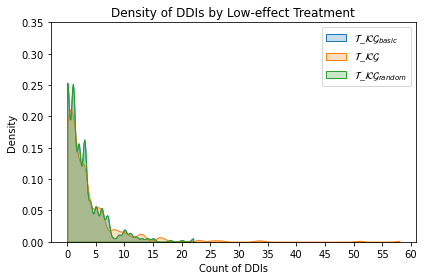

In [16]:
import seaborn as sns
import numpy as np
#ax = sns.kdeplot(cut=0,
#   data=df_plot, shade=True, bw_adjust=.35,
#)

fig, ax = plt.subplots()
sns.kdeplot(data=df_plot['KG1'], ax=ax, shade=True,
            cut=0, bw_adjust=.35, label='${\cal{T\_KG}}_{basic}$')
sns.kdeplot(data=df_plot['KG2'], ax=ax, shade=True,
            cut=0, bw_adjust=.35, label='$\cal{T\_KG}$')
sns.kdeplot(data=df_plot['KG3'], ax=ax, shade=True,
            cut=0, bw_adjust=.35, label='${\cal{T\_KG}}_{random}$')
ax.legend( loc='upper right')




ax.set_xlabel('Count of DDIs')
r1 = np.arange(0, 0.36, 0.05, float)
plt.yticks(r1)
r2 = np.arange(0, 65, 5, float)
plt.xticks(r2)

plt.title('Density of DDIs by Low-effect Treatment')
plt.tight_layout()
plt.savefig('Plots/Density_decrease_effectiveness_treatment.pdf', format='pdf', bbox_inches='tight')

In [400]:
# calculate the spearman's correlation between two variables
from scipy.stats import spearmanr

# prepare data
data1 = list(df_plot.KG1)
data2 = list(df_plot.KG2)
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.994
Samples are correlated (reject H0) p=0.000


In [399]:
df_plot

,KG1,KG2,KG3
0,22,58,22
1,22,51,22
2,20,33,20
3,18,34,18
4,14,23,14
...,...,...,...
519,0,0,0
520,1,1,1
521,0,0,1
522,1,1,1


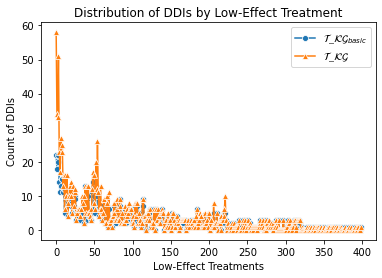

In [17]:
#ax = sns.lineplot(data=df_plot[['KG1', 'KG2']], dashes=False, markers=True)

fig, ax = plt.subplots()
sns.lineplot(data=df_plot['KG1'], ax=ax, dashes=False, marker='o', label='${\cal{T\_KG}}_{basic}$')
sns.lineplot(data=df_plot['KG2'], ax=ax, dashes=False, marker='^', label='$\cal{T\_KG}$')

ax.set_xlabel('Low-Effect Treatments')
ax.set_ylabel('Count of DDIs')
plt.title('Distribution of DDIs by Low-Effect Treatment')

plt.savefig('Plots/Distribution_DDI_Low-Effect_Treatment.pdf', format='pdf', bbox_inches='tight')

In [18]:
count = df_plot.loc[df_plot.KG2>df_plot.KG1].count()
count

KG1    98
KG2    98
KG3    98
dtype: int64

In [19]:
98/399

0.24561403508771928